In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data into DataFrame
df= pd.read_csv('Online_Retail.csv')
df.head()

,TransactionNo,MerchandiseCode,Quan,TransactionDate,ItemPrice,UserID
0,29138841,85123A,8,2020-9-1,2.76,208163.0
1,29138841,71053,8,2020-9-1,2.12,208163.0
2,29138841,84406B,8,2020-9-1,5.12,208163.0
3,29138841,84029G,8,2020-9-1,4.33,208163.0
4,29138841,84029E,8,2020-9-1,3.39,208163.0


In [3]:
# Checking for null values

df.isna().sum().sort_values(ascending=False)

UserID             135080
TransactionNo           0
MerchandiseCode         0
Quan                    0
TransactionDate         0
ItemPrice               0
dtype: int64

In [4]:
df.dropna(axis=0, how='any', inplace=True)
df.isna().sum().sort_values(ascending=False)

TransactionNo      0
MerchandiseCode    0
Quan               0
TransactionDate    0
ItemPrice          0
UserID             0
dtype: int64

In [14]:
# Count the number of occurrences of each element and pick up the top 30
counts = df['MerchandiseCode'].value_counts()
counts = counts[0:30]
counts

85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
20725     1359
22720     1232
POST      1196
20727     1126
22197     1118
23203     1115
22383     1103
21212     1080
23209     1040
23298     1036
22086     1029
22382     1021
20728     1012
22457      997
22469      996
22384      977
22960      974
21034      955
22727      932
23206      907
82482      905
22386      903
22993      902
22138      894
22666      890
Name: MerchandiseCode, dtype: int64

In [44]:
index = list(counts.index)
data = list(counts)


In [45]:
import squarify

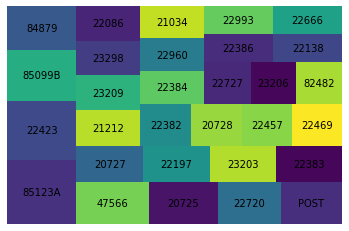

In [46]:
# Frequent items plot
squarify.plot(data,label=index)
plt.axis('off')
plt.show()

In [95]:
# Apriori algorithm
# Group by TransactionNo

grouped_df = df.groupby('TransactionNo')['MerchandiseCode'].apply(list)
grouped_df

TransactionNo
22345123                          [22960, 22913, 22912, 22914]
22753781     [22728, 22727, 22726, 21724, 21883, 10002, 217...
229376172    [22481, 22915, 22178, 22460, 84832, 23084, 848...
291388311    [84879, 22745, 22748, 22749, 22310, 84969, 226...
29138841     [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
                                   ...                        
C581484                                                [23843]
C581490                                         [22178, 23144]
C581499                                                    [M]
C581568                                                [21258]
C581569                                         [84978, 20979]
Name: MerchandiseCode, Length: 22189, dtype: object

In [111]:
content = []
for i in range(22189):
    content.append(grouped_df[i])


In [180]:
from efficient_apriori import apriori

itemsets, rules = apriori(transactions = content, min_support = 0.025, min_confidence = 0.2)

In [181]:
print(itemsets)

{1: {('22960',): 965, ('22728',): 629, ('22727',): 907, ('22726',): 809, ('22326',): 612, ('22629',): 712, ('POST',): 1194, ('22178',): 839, ('23084',): 816, ('84879',): 1385, ('84946',): 704, ('21754',): 700, ('21755',): 557, ('85123A',): 2020, ('22086',): 990, ('82486',): 580, ('82482',): 894, ('82494L',): 826, ('21733',): 692, ('22386',): 884, ('85099C',): 663, ('20725',): 1330, ('21212',): 1041, ('21977',): 675, ('84991',): 664, ('21931',): 791, ('21929',): 614, ('22961',): 880, ('22139',): 839, ('22411',): 801, ('21166',): 613, ('21175',): 699, ('82484',): 615, ('22457',): 984, ('22469',): 972, ('22470',): 817, ('22662',): 605, ('85099B',): 1643, ('22910',): 709, ('22197',): 1085, ('21080',): 734, ('22865',): 583, ('22558',): 650, ('85152',): 593, ('21232',): 639, ('22112',): 707, ('22111',): 663, ('22382',): 1001, ('20726',): 839, ('22384',): 951, ('22467',): 599, ('22383',): 1063, ('20728',): 989, ('20727',): 1073, ('20914',): 798, ('21915',): 569, ('20685',): 583, ('85099F',): 

In [178]:
print(rules)

[{22699} -> {22697}, {22697} -> {22699}]


In [182]:
for r in rules:
    print(r)
               

{22699} -> {22697} (conf: 0.666, supp: 0.025, lift: 20.169, conv: 2.897)
{22697} -> {22699} (conf: 0.760, supp: 0.025, lift: 20.169, conv: 4.008)


In [ ]:
# We can buy 22699 and 22697 together, and the support is 0.025